In [1]:
import os
os.makedirs('output', exist_ok=True)

import sys
sys.path.append('../')

from utils import load_walksheds, overlay_wks
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
from shapely.geometry import Point
import pandas as pd

In [2]:
wksp5, wksp75 = load_walksheds()

In [3]:
bikeshare_data = gpd.read_file ('../../Data/Bike share/Capital_Bikeshare_Locations/Capital_Bikeshare_Locations.shp')

In [4]:
bikeshare_data = bikeshare_data.to_crs("EPSG:4326")

<Axes: >

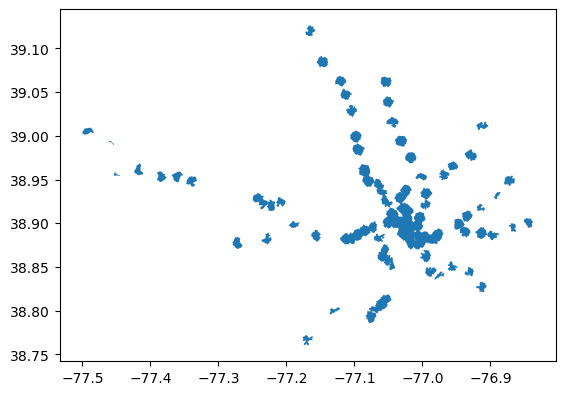

In [5]:
wksp5.plot()

<Axes: >

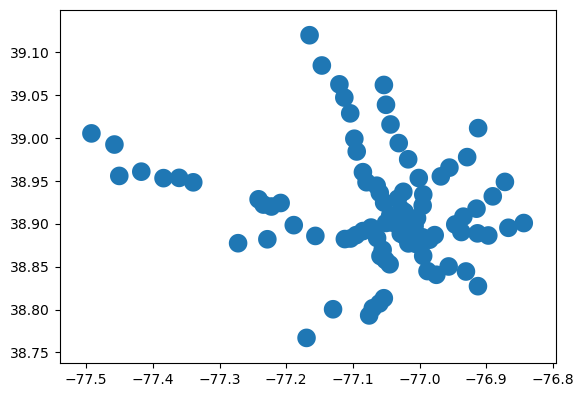

In [6]:
wksp75.plot()

<Axes: >

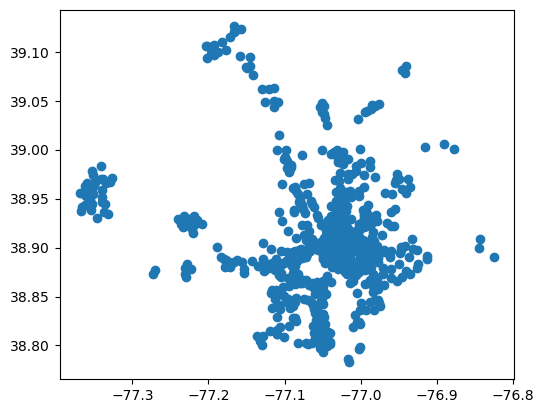

In [7]:
bikeshare_data.plot()

In [9]:
intp5, intp75 = overlay_wks(bikeshare_data)

In [10]:
intp5[['Name_1', 'CAPACITY']].groupby('Name_1').agg({'CAPACITY': 
                                                                 'sum'}).reset_index().rename(columns={'CAPACITY':'CAPACITY_p5'}).to_csv('output/bikeshare_capacity_p5.csv', index=False)

intp75[['Name_1', 'CAPACITY']].groupby('Name_1').agg({'CAPACITY': 
                                                                 'sum'}).reset_index().rename(columns={'CAPACITY':'CAPACITY_p75'}).to_csv('output/bikeshare_capacity_p75.csv', index=False)